# **Predict Future Stock Prices (Short-Term)**

## **1. Problem Statement and Goa**l

**Objective**

Aim to predict the next day’s closing stock price using historical stock market data. By applying machine learning regression techniques, I can identify patterns between stock features and generate predictions for short-term trading insights.

### Approach

I will:

- Select a stock from Yahoo Finance  
- Load historical stock data using `yfinance` API  
- Use stock features:
  - `Open` price
  - `High` price
  - `Low` price
  - `Volume`  
- Train machine learning models:
  - `Linear Regression`
  - `Random Forest Regression`  
- Compare predicted closing prices with actual values


## **2. Import Required Libraries**

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Data fetching
import yfinance as yf

# Visualization
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# **3. Load Dataset using yfinance**

I selected Tesla (TSLA) stock for my prediction task.

In [2]:
# Download Tesla stock data
stock = yf.download("TSLA", start="2020-01-01", end="2025-01-01")

# Display first rows
stock.head()


/tmp/ipython-input-893093432.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("TSLA", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


# **4. Dataset Overview and Exploration**

In [3]:
# Display dataset info and summary statistics
print(stock.info())
print(stock.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1258 non-null   float64
 1   (High, TSLA)    1258 non-null   float64
 2   (Low, TSLA)     1258 non-null   float64
 3   (Open, TSLA)    1258 non-null   float64
 4   (Volume, TSLA)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB
None
Price         Close         High          Low         Open        Volume
Ticker         TSLA         TSLA         TSLA         TSLA          TSLA
count   1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean     213.430922   218.283913   208.359167   213.482528  1.255368e+08
std       83.461475    85.396522    81.534697    83.626859  8.208891e+07
min       24.081333    26.990667    23.367332    24.980000  2.940180e+07
25%      173.882500   177.230003   170.044994   173.897499  7.60195

## **Visualizing Closing Price Trend**

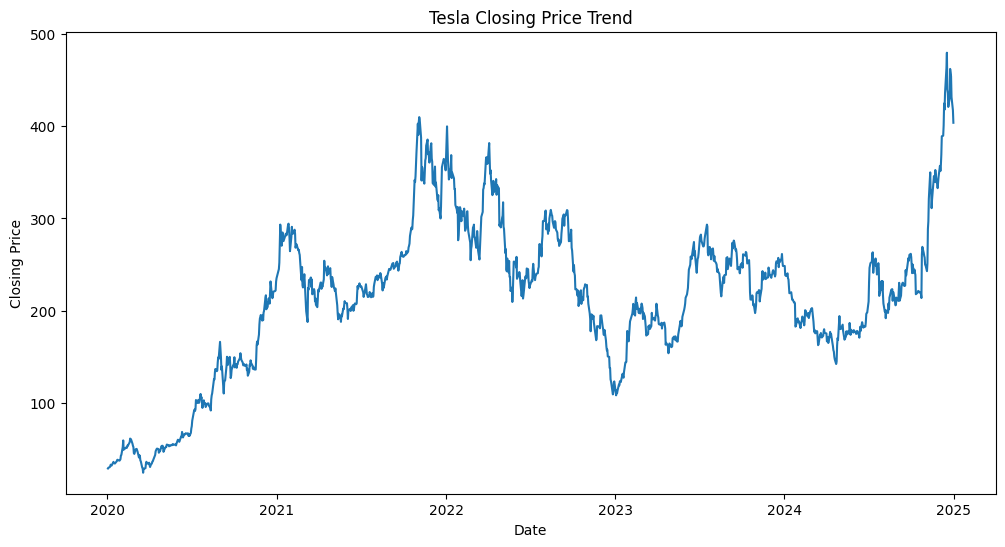

In [4]:
plt.figure(figsize=(12,6))
plt.plot(stock['Close'])
plt.title("Tesla Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


## **5. Data Preprocessing**
**Creating Target Variable**

I want to predict Next Day Close Price, so I shift the Close column by one day.

In [5]:
stock['Next_Close'] = stock['Close'].shift(-1)
stock = stock.dropna()


## **Selecting Features and Target**

In [6]:
X = stock[['Open', 'High', 'Low', 'Volume']]
y = stock['Next_Close']


## **Train-Test Split (Time Series Friendly)**

Since stock data is time-based, I avoid random shuffling.

In [7]:
split = int(len(stock) * 0.8)

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]


# **6. Model Training**

**Linear Regression Model**

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)


**Random Forest Model**

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


## **7. Model Evaluation**

Evaluation Function

In [10]:
def evaluate_model(true, pred, name):
    print(f"\n{name} Performance")
    print("MAE:", mean_absolute_error(true, pred))
    print("RMSE:", np.sqrt(mean_squared_error(true, pred)))
    print("R2 Score:", r2_score(true, pred))


Evaluate Both Models

In [11]:
evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest")



Linear Regression Performance
MAE: 6.938056768499431
RMSE: 10.125358726976748
R2 Score: 0.9795753492490631

Random Forest Performance
MAE: 8.922572856479219
RMSE: 14.124737903914504
R2 Score: 0.960253892972332


## **8. Visualization: Actual vs Predicted Prices**

Linear Regression Prediction Plot

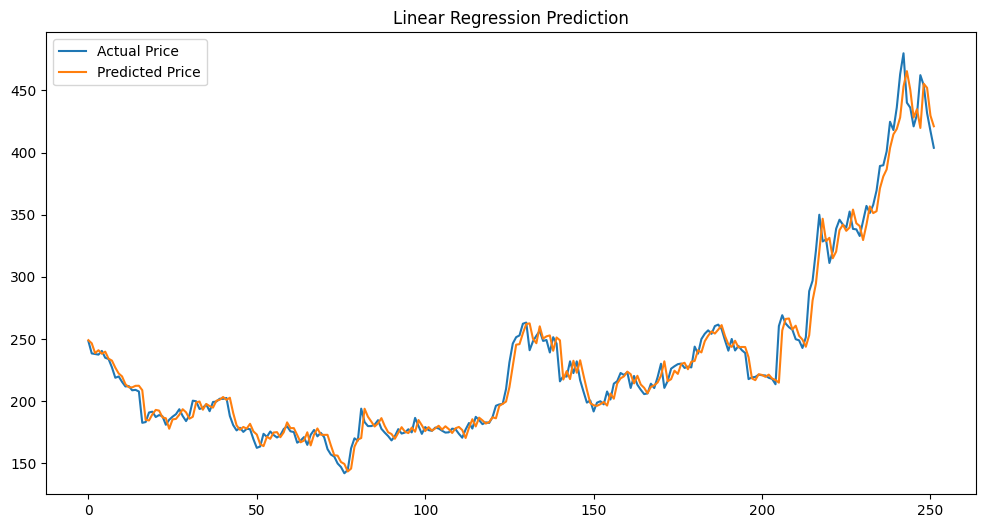

In [12]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Price")
plt.plot(lr_pred, label="Predicted Price")
plt.title("Linear Regression Prediction")
plt.legend()
plt.show()


Random Forest Prediction Plot

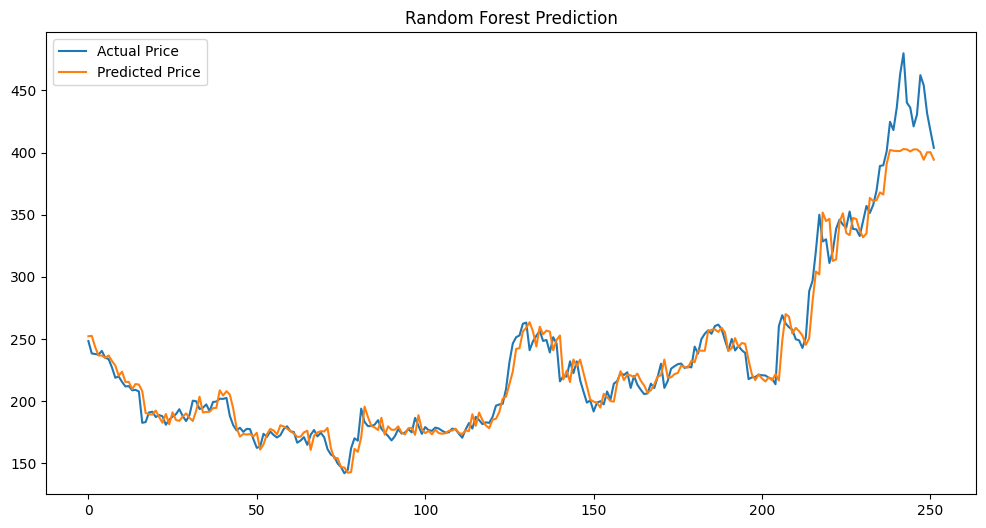

In [13]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Price")
plt.plot(rf_pred, label="Predicted Price")
plt.title("Random Forest Prediction")
plt.legend()
plt.show()


## **9. Results Discussion and Insights**

#### Observations

- Both models successfully captured Tesla’s stock price patterns.  
- Random Forest performed better because it can capture non-linear relationships.  
- Linear Regression works for simple trends but struggles with market volatility.  

#### Key Insights

- `Open`, `High`, and `Low` prices strongly influence the next day’s closing price.  
- Trading `Volume` provides additional insight into price movements.  
- Ensemble models like Random Forest provide more stable predictions.  
- Short-term stock prediction is possible but has inherent uncertainty.
